In [1]:
import pcl
import numpy as np
import matplotlib.pyplot as plt

pclfile = "/home/joyvan/work/20180702/data/person/SAM-GOV-001/measurements/1530268828151/pc/pc_SAM-GOV-001_1530268828151_104_000.pcd"
p = pcl.load(pclfile)


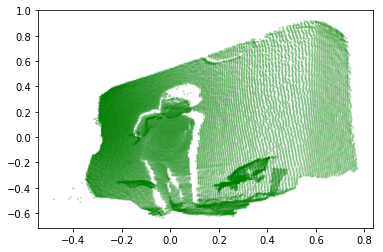

In [22]:
parray = np.asarray(p)
plt.scatter(parray[:,1],parray[:,0], parray[:,2], c="g", alpha=0.2)
plt.show()

In [ ]:
# Pointcloud segmentation example
# https://github.com/strawlab/python-pcl/blob/master/examples/segment_cyl_plane.py

36509
29344


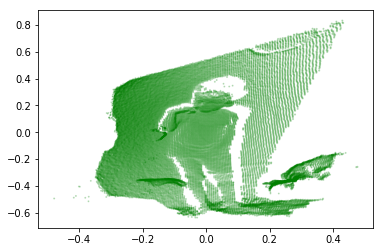

In [10]:
cloud = p
print(cloud.size)

fil = cloud.make_passthrough_filter()
fil.set_filter_field_name("z")
fil.set_filter_limits(0, 1.5)
cloud_filtered = fil.filter()

print(cloud_filtered.size)

parray = np.asarray(cloud_filtered)
plt.scatter(parray[:,1],parray[:,0], parray[:,2], c="g", alpha=0.2)
plt.show()


In [13]:
seg = cloud_filtered.make_segmenter_normals(ksearch=50)
seg.set_optimize_coefficients(True)
seg.set_model_type(pcl.SACMODEL_NORMAL_PLANE)
seg.set_normal_distance_weight(0.1)
seg.set_method_type(pcl.SAC_RANSAC)
seg.set_max_iterations(100)
seg.set_distance_threshold(0.03)
indices, model = seg.segment()

print(model)



[0.1941249817609787, -0.7930994629859924, 0.5773289799690247, -0.6664498448371887]


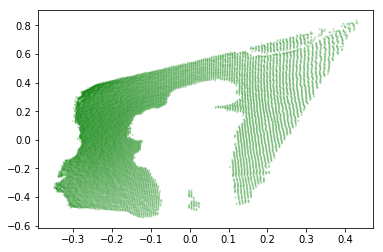

In [19]:
cloud_plane = cloud_filtered.extract(indices, negative=False)

parray = np.asarray(cloud_plane)
plt.scatter(parray[:,1],parray[:,0], parray[:,2], c="g", alpha=0.2)
plt.show()

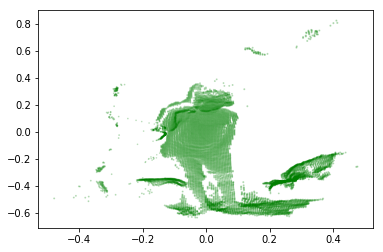

In [18]:
cloud_cyl = cloud_filtered.extract(indices, negative=True)

parray = np.asarray(cloud_plane)
plt.scatter(parray[:,1],parray[:,0], parray[:,2], c="g", alpha=0.2)
plt.show()

In [20]:
seg = cloud_cyl.make_segmenter_normals(ksearch=50)
seg.set_optimize_coefficients(True)
seg.set_model_type(pcl.SACMODEL_CYLINDER)
seg.set_normal_distance_weight(0.1)
seg.set_method_type(pcl.SAC_RANSAC)
seg.set_max_iterations(10000)
seg.set_distance_threshold(0.05)
seg.set_radius_limits(0, 0.1)
indices, model = seg.segment()

print(model)

cloud_cylinder = cloud_cyl.extract(indices, negative=False)

[-0.289770245552063, -0.022202083840966225, 1.0714772939682007, 0.9733879566192627, -0.025519605726003647, -0.22773821651935577, 0.07707500457763672]


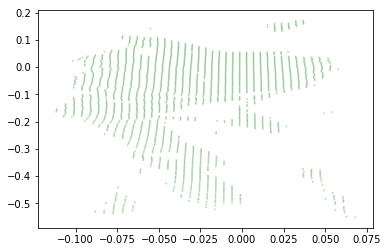

In [21]:
parray = np.asarray(cloud_cylinder)
plt.scatter(parray[:,1],parray[:,0], parray[:,2], c="g", alpha=0.2)
plt.show()